#Assignment 3

## DSC 478 - Programming ML Apps
## Alex Teboul

##Assignment Background

For this assignment you will experiment with various regression approaches and you'll get your feet wet with some clustering. We will rely on subsets of some real-world data sets and on tools from the scikit-learn machine learning package for Python as well as modules from the textbook code (Machine Learning in Action, Chapters 8 and 10).

# Problem 1 - Linear Regression

## a.

Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [0]:
#imports
import pandas as pd
import numpy as np

In [201]:
#Mount Google Drive to get files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
#Files
#train_matrix
compath = '/content/drive/My Drive/Colab Notebooks/datasets/communities/communities.csv'
com_data = pd.read_csv(compath, sep=",",na_values='?')
com_data.shape

(1994, 100)

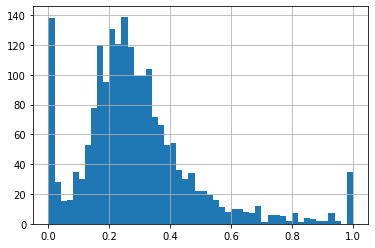

In [203]:
#impute with median because of skew
com_data.OtherPerCap.hist(bins=50)

In [0]:
# deal with '?' value in OtherPerCap
com_data.OtherPerCap.fillna(com_data.OtherPerCap.median(), inplace=True)

In [205]:
com_data.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,...,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.68,0.40,...,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,1.00,0.63,...,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.63,0.41,...,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.34,0.45,...,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.22,0.27,...,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


**Compute and display basic statistics**

In [206]:
com_data.describe()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,...,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,0.064072,0.696269,0.361123,0.558154,0.291570,0.495687,0.471133,0.317778,0.479248,0.375677,0.350251,0.368049,0.291098,0.203506,0.322357,0.284724,0.386279,0.055507,0.303024,0.315807,0.383330,0.361675,0.363531,0.501073,0.396384,0.440597,0.461244,0.434453,0.487568,...,0.785903,0.150587,0.267608,0.251891,0.462101,0.494428,0.404097,0.562598,0.186264,0.495186,0.314694,0.076815,0.719549,0.548686,0.204529,0.433335,0.494178,0.264478,0.243059,0.264689,0.263490,0.268942,0.346379,0.372457,0.422964,0.384102,0.490125,0.449754,0.403816,0.029438,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,0.128256,0.444811,0.209362,0.182913,0.204108,0.178071,0.173619,0.222137,0.167564,0.198257,0.191109,0.186804,0.171593,0.164775,0.195411,0.190962,0.183081,0.127941,0.228474,0.213360,0.202508,0.209193,0.202171,0.174036,0.202386,0.175457,0.182460,0.175437,0.175170,...,0.226869,0.219716,0.196567,0.190709,0.169551,0.157924,0.189301,0.197087,0.209956,0.172508,0.255182,0.150465,0.194024,0.185204,0.217770,0.188986,0.232467,0.242847,0.206295,0.224425,0.231542,0.235252,0.219323,0.209278,0.248286,0.213404,0.169500,0.187274,0.192593,0.102607,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

**Separate the target attribute for regression**

In [207]:
com_x = com_data.drop(columns = ['state','communityname','ViolentCrimesPerPop'])
com_x = com_x.astype('float64')
com_x.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,...,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.68,0.40,0.75,0.75,...,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,1.00,0.63,0.91,1.00,...,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.63,0.41,0.71,0.70,...,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.34,0.45,0.49,0.44,...,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.22,0.27,0.20,0.21,...,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [208]:
com_target = com_data[['ViolentCrimesPerPop']]
com_target.head()

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03


In [0]:
com_x_npp = com_x.to_numpy()
com_x_np = np.array([np.concatenate((v,[1.0])) for v in com_x_npp])
com_target_series = pd.Series(com_target['ViolentCrimesPerPop'])
com_target_np = com_target_series.to_numpy()

In [210]:
#Check x numpy array
print(com_x_np[:2])

[[0.19 0.33 0.02 0.9  0.12 0.17 0.34 0.47 0.29 0.32 0.2  1.   0.37 0.72
  0.34 0.6  0.29 0.15 0.43 0.39 0.4  0.39 0.32 0.27 0.27 0.36 0.41 0.08
  0.19 0.1  0.18 0.48 0.27 0.68 0.23 0.41 0.68 0.4  0.75 0.75 0.35 0.55
  0.59 0.61 0.56 0.74 0.76 0.04 0.14 0.03 0.24 0.27 0.37 0.39 0.07 0.07
  0.08 0.08 0.89 0.06 0.14 0.13 0.33 0.39 0.28 0.55 0.09 0.51 0.5  0.21
  0.71 0.52 0.05 0.26 0.65 0.14 0.06 0.22 0.19 0.18 0.36 0.35 0.38 0.34
  0.38 0.46 0.25 0.04 0.   0.12 0.42 0.5  0.51 0.64 0.12 0.26 0.2  1.  ]
 [0.   0.16 0.12 0.74 0.45 0.07 0.26 0.59 0.35 0.27 0.02 1.   0.31 0.72
  0.11 0.45 0.25 0.29 0.39 0.29 0.37 0.38 0.33 0.16 0.3  0.22 0.35 0.01
  0.24 0.14 0.24 0.3  0.27 0.73 0.57 0.15 1.   0.63 0.91 1.   0.29 0.43
  0.47 0.6  0.39 0.46 0.53 0.   0.24 0.01 0.52 0.62 0.64 0.63 0.25 0.27
  0.25 0.23 0.84 0.1  0.16 0.1  0.17 0.29 0.17 0.26 0.2  0.82 0.   0.02
  0.79 0.24 0.02 0.25 0.65 0.16 0.   0.21 0.2  0.21 0.42 0.38 0.4  0.37
  0.29 0.32 0.18 0.   0.   0.21 0.5  0.34 0.6  0.52 0.02 0.12 0

In [211]:
#Check target numpy array
print(com_target_np[:2])

[0.2  0.67]


## b.
Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.cross_validation).

In [0]:
#MLA Ch.8 Standard Linear Regression
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [213]:
#coefficients
w = standRegres(com_x_np,com_target_np)
w.shape

(98, 1)

In [214]:
#check first 10 coefficients
print(w[:10])

[[ 0.13100493]
 [-0.03140101]
 [ 0.20990279]
 [-0.04056011]
 [-0.01389758]
 [ 0.05900913]
 [ 0.12333734]
 [-0.22263745]
 [-0.14742828]
 [ 0.05020185]]


In [0]:
#make predictions
xMat=np.mat(com_x_np)
yMat=np.mat(com_target_np)
yHat = xMat*w

In [216]:
yHat.shape

(1994, 1)

In [217]:
print (yHat[0:10])

[[ 0.16553985]
 [ 0.29060553]
 [ 0.38367604]
 [ 0.32269589]
 [-0.02124193]
 [ 0.23017346]
 [ 0.08799567]
 [ 0.44236695]
 [ 0.23750267]
 [ 0.00519446]]


In [218]:
print(yMat.T[0:10])

[[0.2 ]
 [0.67]
 [0.43]
 [0.12]
 [0.03]
 [0.14]
 [0.03]
 [0.55]
 [0.53]
 [0.15]]


**Compute the RMSE on the full training data**

In [0]:
#transform predictions
p = yHat.A.ravel()

In [220]:
# Now we can constuct a vector of errors
err = abs(p-com_target_np)

# Let's see the error on the first 10 predictions
print (err[:10])

[0.03446015 0.37939447 0.04632396 0.20269589 0.05124193 0.09017346
 0.05799567 0.10763305 0.29249733 0.14480554]


In [221]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print("RMSE Training Data:", rmse_train)

RMSE Training Data: 0.1288876409101824


**Plot the correlation between the predicted and actual values of the target attribute**

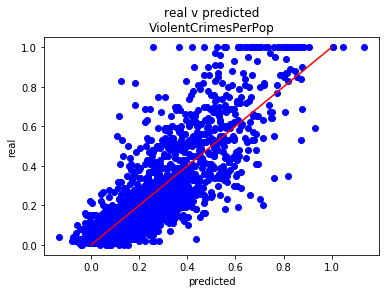

In [222]:
import pylab as pl
# Plot outputs
%matplotlib inline
pl.plot(p, com_target_np,'bo')
pl.plot([0,1],[0,1], 'r-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.title('real v predicted\nViolentCrimesPerPop')
pl.show()

**Display the obtained regression coefficients (weights)**

In [223]:
#get shape
w.shape

(98, 1)

In [224]:
#get values
w.A.ravel()

array([ 1.31004930e-01, -3.14010065e-02,  2.09902786e-01, -4.05601115e-02,
       -1.38975776e-02,  5.90091256e-02,  1.23337344e-01, -2.22637450e-01,
       -1.47428281e-01,  5.02018454e-02, -2.42273093e-01,  4.63966980e-02,
       -1.96960667e-01, -2.06125826e-01,  4.66013287e-02, -1.77224854e-01,
        6.29780185e-02,  1.14964338e-02, -9.08903208e-02,  2.74640215e-01,
        1.01812034e-01, -3.31565088e-01, -2.91956055e-02, -3.54522229e-02,
        2.26288706e-02,  4.33296337e-02,  3.43620753e-02,  1.28366418e-01,
       -1.91259421e-01, -1.00746784e-01,  6.46523213e-02,  1.06078903e-01,
        1.56973896e-05,  2.34981121e-01, -3.75728828e-02, -7.74626866e-03,
        4.66851160e-01,  2.26307821e-01,  1.74659870e-01, -5.75302969e-01,
       -1.41945460e-01,  5.68725337e-02, -3.51039800e-01, -3.49743239e-02,
        4.55798134e-04,  5.57032911e-02, -1.82246659e-01, -1.54637442e-01,
        1.26177907e-01, -1.44299838e-01,  2.38863390e-02,  3.33947883e-02,
       -7.42543109e-02,  

**Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.cross_validation)**

In [0]:
#imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score #uses KFold by default
from sklearn.linear_model import LinearRegression

In [226]:
# Compute RMSE using 10-fold x-validation
# Create linear regression object
linreg = LinearRegression() #yields the same result as the Ch 8 MLA example
n = 10
#kf = KFold(len(x),n_splits=n)

kf = KFold(n_splits=n)
kf.get_n_splits(com_x_np)

print(kf)  
KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0
#or train,test in kf:
for train, test in kf.split(com_x_np):
    linreg.fit(com_x_np[train],com_target_np[train])
    pr = linreg.predict(com_x_np[test])
    e = pr-com_target_np[test]
    xval_err += np.sqrt(np.dot(e,e)/len(com_x_np[test]))
       
rmse_10cv = xval_err/n

KFold(n_splits=10, random_state=None, shuffle=False)


**Compare RMSE on Training and 10-fold CV**

In [227]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1289
RMSE on 10-fold CV: 0.1359


*   The RMSE for Training and 10-Fold CV are close (0.1289 to 0.1359 respectively).



## c.

Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]


*   Note that cross_validation.cross_val_score has been deprecated. We can't actually assign mean_absolute_error scoring as directed in the homework prompt. model_selection.cross_val_score does accept 'neg_mean_absolute_error' though. So scores are multiplied by -1 for the appropriate score. Accuracy is also reported.



In [0]:
#imports
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error

**Show the list of most informative variables and their weights**

In [229]:
import warnings; warnings.simplefilter('ignore')
lm = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(com_x_np, com_target_np)
    scores = model_selection.cross_val_score(lm, X_train_fs, com_target_np, scoring = 'neg_mean_absolute_error', cv=5)
    print (i,scores.mean()*-1)
    results = np.append(results, scores.mean()*-1)

optimal_percentile = np.where(results == results.max())[0]
print(optimal_percentile[0])
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile[0]]), "\n")
optimal_num_features = int(percentiles[optimal_percentile[0]]*len(com_x.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

1 0.11407909224209818
6 0.1011518954003291
11 0.10108738571229887
16 0.1010448096187686
21 0.09886424513530563
26 0.09657268911607834
31 0.09652815800003076
36 0.09569677985937057
41 0.0958121897628663
46 0.09641184981816638
51 0.09672043610039369
56 0.09691763718778297
61 0.09767947698307727
66 0.09777190769444884
71 0.09809307676734698
76 0.09775414558827022
81 0.09765589825801516
86 0.0971248710056017
91 0.09751928795970309
96 0.09688361132326875
0
Optimal percentile of features:1 

Optimal number of features:0 



**Plot the model's mean absolute error values on cross-validation relative to the percentage of selected features**

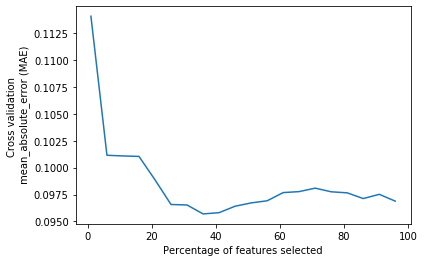

In [230]:
# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation \n mean_absolute_error (MAE)")
pl.plot(percentiles,results)

**Accuracy plot for reference**

1 0.5426547452399858
6 0.6017067575632016
11 0.611466074222782
16 0.6120936164773824
21 0.6284547541930063
26 0.6420064965365857
31 0.6414911742377145
36 0.6449835857807804
41 0.6447814085783337
46 0.6419594293767954
51 0.6402524990712182
56 0.6407035764163449
61 0.6398412807628088
66 0.6396524924327041
71 0.6391989417272407
76 0.6427780074356966
81 0.643631342753214
86 0.6456205747318501
91 0.6446374486824492
96 0.6476345221750891
19
Optimal percentile of features:96 

Optimal number of features:93 



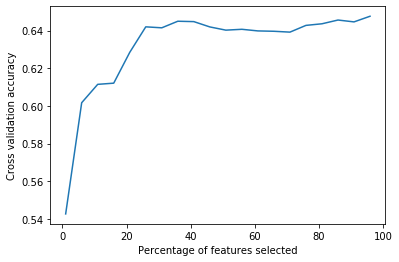

In [231]:
import warnings; warnings.simplefilter('ignore')
lm = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(com_x_np, com_target_np)
    scores = model_selection.cross_val_score(lm, X_train_fs, com_target_np, cv=5)
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
print(optimal_percentile[0])
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile[0]]), "\n")
optimal_num_features = int(percentiles[optimal_percentile[0]]*len(com_x.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

**Feature names**

In [232]:
#feats = np.r_[1,6,11]
zzzzz = com_x.iloc[:, np.r_[1,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96]]
zzzzz.columns

Index(['householdsize', 'agePct12t21', 'pctUrban', 'pctWSocSec', 'whitePerCap',
       'HispPerCap', 'PctBSorMore', 'MalePctDivorce', 'PctFam2Par',
       'PctWorkMom', 'PctImmigRec5', 'PctRecImmig8', 'PctLargHouseOccup',
       'PctPersDenseHous', 'PctHousOwnOcc', 'PctWOFullPlumb', 'RentMedian',
       'MedOwnCostPctIncNoMtg', 'PctSameHouse85', 'PctUsePubTrans'],
      dtype='object')

## d.

Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [0]:
#Imports
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

**Create an 80/20 train test split**

In [0]:
#Split the data into train/test sets
x_train, x_test, y_train, y_test = train_test_split(com_x_np, com_target_np, test_size=0.2, random_state=7)

**Ridge Regression & Lasso Regression**

In [235]:
#a = 0.2
k=5

X = x_train
y = y_train

for name,met in [
        #('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('lasso', Lasso(fit_intercept=True)),
        #('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True)),
        ]:
    met.fit(X,y)
    p = met.predict(X)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    #kf = KFold(len(x), n_folds=5)
    kf = KFold(n_splits=k)
    kf.get_n_splits(X)

    KFold(n_splits=n,random_state=None, shuffle=False)
    err = 0
    for train,test in kf.split(X):
        met.fit(X[train],y[train])
        p = met.predict(X[test])
        e = p-y[test]
        err += np.dot(e,e)
    rmse_10cv = np.sqrt(err/len(X))
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print ("\n")

Method: lasso
RMSE on training: 0.2326
RMSE on 10-fold CV: 0.2327


Method: ridge
RMSE on training: 0.1305
RMSE on 10-fold CV: 0.1382




**Ridge Regression alpha parameter tuning**

In [236]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,10,50)
t_rmse = np.array([])
cv_rmse = np.array([])
k=5
for a in alpha:
    ridge = Ridge(alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(X,y)
    p = ridge.predict(X)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(n_splits=k)
    kf.get_n_splits(X)
 
    KFold(n_splits=k,random_state=None, shuffle=False)
    # computing RMSE using 5-fold cross validation
    #kf = KFold(len(X), n_folds=5)
    xval_err = 0
    for train, test in kf.split(X):
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.sqrt(np.dot(err,err)/len(X[test]))
    rmse_10cv = xval_err/n
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1293		 0.0693
0.214	 0.1296		 0.0689
0.418	 0.1298		 0.0688
0.622	 0.1301		 0.0688
0.826	 0.1303		 0.0688
1.029	 0.1305		 0.0688
1.233	 0.1307		 0.0688
1.437	 0.1308		 0.0689
1.641	 0.1310		 0.0689
1.845	 0.1312		 0.0689
2.049	 0.1313		 0.0689
2.253	 0.1315		 0.0689
2.457	 0.1316		 0.0690
2.660	 0.1317		 0.0690
2.864	 0.1318		 0.0690
3.068	 0.1319		 0.0690
3.272	 0.1321		 0.0690
3.476	 0.1322		 0.0691
3.680	 0.1323		 0.0691
3.884	 0.1324		 0.0691
4.088	 0.1325		 0.0691
4.291	 0.1325		 0.0691
4.495	 0.1326		 0.0692
4.699	 0.1327		 0.0692
4.903	 0.1328		 0.0692
5.107	 0.1329		 0.0692
5.311	 0.1330		 0.0692
5.515	 0.1330		 0.0692
5.719	 0.1331		 0.0692
5.922	 0.1332		 0.0693
6.126	 0.1332		 0.0693
6.330	 0.1333		 0.0693
6.534	 0.1334		 0.0693
6.738	 0.1334		 0.0693
6.942	 0.1335		 0.0693
7.146	 0.1336		 0.0693
7.350	 0.1336		 0.0693
7.553	 0.1337		 0.0694
7.757	 0.1337		 0.0694
7.961	 0.1338		 0.0694
8.165	 0.1338		 0.0694
8.369	 0.1

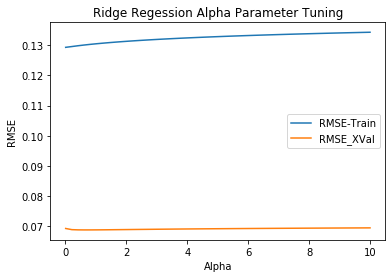

In [237]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.title('Ridge Regession Alpha Parameter Tuning')
pl.show()


*   alpha = 0.3 is a good enough choice for this Ridge model



**Lasso Regression alpha parameter tuning**

In [238]:
print('Lasso Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.001,.05,50)
t_rmse = np.array([])
cv_rmse = np.array([])
k=5
for a in alpha:
    lasso = Lasso(alpha=a)
    
    # computing the RMSE on training data
    lasso.fit(X,y)
    p = lasso.predict(X)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(n_splits=k)
    kf.get_n_splits(X)
 
    KFold(n_splits=k,random_state=None, shuffle=False)
    # computing RMSE using 5-fold cross validation
    #kf = KFold(len(X), n_folds=5)
    xval_err = 0
    for train, test in kf.split(X):
        lasso.fit(X[train], y[train])
        p = lasso.predict(X[test])
        err = p - y[test]
        xval_err += np.sqrt(np.dot(err,err)/len(X[test]))
    rmse_10cv = xval_err/n
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Lasso Regression
alpha	 RMSE_train	 RMSE_10cv

0.001	 0.1375		 0.0697
0.002	 0.1398		 0.0706
0.003	 0.1418		 0.0713
0.004	 0.1437		 0.0722
0.005	 0.1459		 0.0733
0.006	 0.1486		 0.0746
0.007	 0.1516		 0.0759
0.008	 0.1537		 0.0770
0.009	 0.1558		 0.0780
0.010	 0.1577		 0.0789
0.011	 0.1593		 0.0797
0.012	 0.1611		 0.0806
0.013	 0.1629		 0.0815
0.014	 0.1650		 0.0825
0.015	 0.1671		 0.0836
0.016	 0.1694		 0.0847
0.017	 0.1717		 0.0859
0.018	 0.1742		 0.0872
0.019	 0.1768		 0.0885
0.020	 0.1795		 0.0898
0.021	 0.1822		 0.0912
0.022	 0.1851		 0.0926
0.023	 0.1879		 0.0939
0.024	 0.1904		 0.0952
0.025	 0.1929		 0.0965
0.026	 0.1956		 0.0978
0.027	 0.1982		 0.0992
0.028	 0.2010		 0.1006
0.029	 0.2038		 0.1020
0.030	 0.2067		 0.1034
0.031	 0.2096		 0.1048
0.032	 0.2126		 0.1063
0.033	 0.2157		 0.1078
0.034	 0.2186		 0.1093
0.035	 0.2216		 0.1108
0.036	 0.2246		 0.1123
0.037	 0.2277		 0.1138
0.038	 0.2308		 0.1151
0.039	 0.2326		 0.1157
0.040	 0.2326		 0.1161
0.041	 0.2326		 0.1161
0.042	 0.2

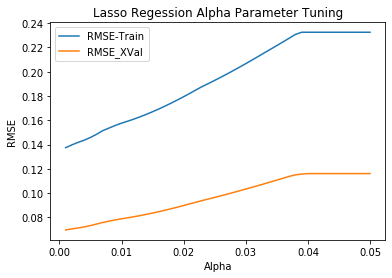

In [239]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.title('Lasso Regession Alpha Parameter Tuning')
pl.show()

*  alpha closer to zero the better, but around 0.04 maybe more stable.



**Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. (Ridge, alpha = 0.3)**

In [240]:
a = 0.3
k=5

X_t = x_test
y_t = y_test

for name,met in [
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(X_t,y_t)
    p = met.predict(X_t)
    e = p-y_t
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    #kf = KFold(len(X_t), n_folds=5)
    kf = KFold(n_splits=k)
    kf.get_n_splits(X_t)

    KFold(n_splits=n,random_state=None, shuffle=False)
    err = 0
    for train,test in kf.split(X_t):
        met.fit(X_t[train],y_t[train])
        p = met.predict(X_t[test])
        e = p-y_t[test]
        err += np.dot(e,e)
    rmse_10cv = np.sqrt(err/len(X_t))
    
    print('Method with alpha = 0.3: %s' %name)
    print('RMSE on testing: %.4f' %rmse_train)
    print('RMSE on 5-fold CV: %.4f' %rmse_10cv)
    print ("\n")

Method with alpha = 0.3: ridge
RMSE on testing: 0.1081
RMSE on 5-fold CV: 0.1344




*  It appears that Ridge Regression is better in terms of yielding a lower RMSE than Lasso in this case. Test set RMSE is reasonably low. Best alpha was 0.3.

## e. 
Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start by a creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

**80/20 train/test split**

In [0]:
#Imports
from sklearn.linear_model import SGDRegressor, ElasticNet

In [0]:
#Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(com_x_np, com_target_np, test_size=0.2, random_state=7)

*  Already standardized, but will use StandarScaler anyways.

**For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10).**

In [243]:
from sklearn.model_selection import GridSearchCV

sgdreg = SGDRegressor()

param_grid = {
    'alpha': np.linspace(.0001, 10, 100),
    'penalty': ['l2', 'l1'],
}
gridsearch = GridSearchCV(sgdreg, param_grid, cv=5)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, ver...
       8.08082727e+00, 8.18183636e+00, 8.28284545e+00, 8.38385455e+00,
       8.48486364e+00, 8.58587273e+00, 8.68688182e+00, 8.78789091e+00,
       8.88890000e+00, 8.98990909e+00, 9.09091818e+00, 9.19192727e+00,
       9.29293636e+00, 9.39394545e+00, 9.49495455e+00, 9.59596364e+00,
       9.69697273e+00, 9.79798182e+00, 9.8

In [244]:
print("Best Parameters: " + str(gridsearch.best_params_))

Best Parameters: {'alpha': 0.0001, 'penalty': 'l1'}


In [245]:
print("Best Score: " + str(gridsearch.best_score_))

Best Score: 0.6274205126459339


In [246]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling. but it's already scaled

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
x_s = scaler.transform(X_train)

sgdreg = SGDRegressor(penalty='l1', alpha=0.0001, max_iter=300)

# Compute RMSE on training data
sgdreg.fit(x_s,y_train)
p = sgdreg.predict(x_s)
err = p-y_train
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
#kf = KFold(len(x), n_folds=10)
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

KFold(n_splits=n,random_state=None, shuffle=False)
    
xval_err = 0
for train,test in kf.split(X_train):
    scaler = StandardScaler()
    scaler.fit(X_train[train])  
    xtrain_s = scaler.transform(X_train[train])
    xtest_s = scaler.transform(X_train[test])
    sgdreg.fit(xtrain_s,y_train[train])
    p = sgdreg.predict(xtest_s)
    e = p-y_train[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(X_train))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 5-fold CV: %.4f' %rmse_10cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1338
RMSE on 5-fold CV: 0.1411


**Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with the "elasticnet" penalty parameter**

In [247]:
#best
scaler = StandardScaler()
scaler.fit(X_test)
x_t = scaler.transform(X_test)

sgdreg = SGDRegressor(penalty='elasticnet', alpha=0.0001, max_iter=300)

# Compute RMSE on training data
sgdreg.fit(x_t,y_test)
p = sgdreg.predict(x_t)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
#kf = KFold(len(x), n_folds=10)
kf = KFold(n_splits=10)
kf.get_n_splits(X_test)

KFold(n_splits=n,random_state=None, shuffle=False)
    
xval_err = 0
for train,test in kf.split(X_test):
    scaler = StandardScaler()
    scaler.fit(X_test[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(X_test[train])
    xtest_s = scaler.transform(X_test[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y_test[train])
    p = sgdreg.predict(xtest_s)
    e = p-y_test[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(X_test))

method_name = 'Elastic Net Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 5-fold CV: %.4f' %rmse_10cv)

Method: Elastic Net Regression
RMSE on training: 0.1130
RMSE on 5-fold CV: 0.1334


**Summary**

* Best is actually worse than for the other method from this run. 

*  Ridge Regresion with alpha = 0.3
 * RMSE on testing: 0.1081
 * RMSE on 5-fold CV: 0.1344

*  Elastic Net Regression
 * RMSE on training: 0.1161
 * RMSE on 5-fold CV: 0.1332


*  Simple Linear Regression
 * RMSE on training: 0.1289
 * RMSE on 5-fold CV: 0.1359


*  Stochastic Gradient Descent Regression
 * RMSE on training: 0.1368
 * RMSE on 5-fold CV: 0.1399


*  Lasso
 * RMSE on training: 0.2326
 * RMSE on 5-fold CV: 0.2327

* It appears that Ridge Regression and Elastic net were the top performers. Lasso the worst.







# Problem 2 - Automatic Document Clustering

For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]

## a.

Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [0]:
#MLA cosine sim implementation
import numpy as np
def cosSim(inA,inB):
 num = float(inA.T*inB)
 denom = np.linalg.norm(inA)*np.linalg.norm(inB)
 return 0.5+0.5*(num/denom)

In [0]:
def distEclud(vecA, vecB):
  return np.sqrt(sum(np.power(vecA - vecB, 2)))

In [0]:
#MLA kMeans implementation
def loadDataSet(fileName):
  dataMat = []
  fr = open(fileName)
  for line in fr.readlines():
    curLine = line.strip().split('\t')
    fltLine = map(float,curLine)
    dataMat.append(fltLine)
  return dataMat

In [0]:
#MLA
def randCent(dataSet, k):
  n = np.shape(dataSet)[1]
  centroids = np.mat(np.zeros((k,n)))
  for j in range(n):
    minJ = min(dataSet[:,j])
    rangeJ = float(max(dataSet[:,j]) - minJ)
    centroids[:,j] = minJ + rangeJ * np.random.rand(k,1)
  return centroids

In [0]:
#MLA
def MLA_kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
  m = np.shape(dataSet)[0]
  clusterAssment = np.mat(np.zeros((m,2)))
  centroids = createCent(dataSet, k)
  clusterChanged = True
  while clusterChanged:
    clusterChanged = False
    for i in range(m):
      minDist = np.inf; minIndex = -1
      for j in range(k):
        distJI = distMeas(centroids[j,:],dataSet[i,:])
        if distJI < minDist:
          minDist = distJI; minIndex = j
        if clusterAssment[i,0] != minIndex: clusterChanged = True
        clusterAssment[i,:] = minIndex,minDist**2
    print(centroids)
    for cent in range(k):
      ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
      centroids[cent,:] = mean(ptsInClust, axis=0)
  return centroids, clusterAssment

## b.
 
Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [253]:
#Mount Google Drive to get files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [254]:
import pandas as pd

#classes.txt
classpath = '/content/drive/My Drive/Colab Notebooks/datasets/newsgroups5/classes.txt'
class_data = pd.read_csv(classpath, sep=" ", skiprows=1, index_col=0, header=None )
class_data.shape

(2500, 1)

In [255]:
class_data.head()

,1
0,
0,0
1,1
2,1
3,1
4,2


In [256]:
#terms.txt
termspath = '/content/drive/My Drive/Colab Notebooks/datasets/newsgroups5/terms.txt'
terms_data = pd.read_csv(termspath, header=None)
terms_data.shape

(9328, 1)

In [257]:
terms_data.head()

,0
0,aa
1,aargh
2,aaron
3,aaronc
4,ab


In [258]:
terms_d2 = pd.read_csv(termspath, header=None, names=['terms'])
terms_d2.head()

,terms
0,aa
1,aargh
2,aaron
3,aaronc
4,ab


In [259]:
#matrix.txt
matrixpath = '/content/drive/My Drive/Colab Notebooks/datasets/newsgroups5/matrix.txt'
matrix_data = pd.read_csv(matrixpath, sep=",", header=None)
matrix_data.shape

(9328, 2500)

In [260]:
matrix_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.]**

In [261]:
import numpy as np
x2_T = matrix_data.values.T
x2_T.shape

(2500, 9328)

In [262]:
y2 = class_data.values
y2.shape

(2500, 1)

**Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.**

In [263]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x2_T, y2, test_size=0.2, random_state=7)
print(x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape)

(2000, 9328) (500, 9328) (2000, 1) (500, 1)


##c.

Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). Sort the terms for each cluster in decreasing order of the DF percentage. Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequency from the cluster centroid is also shown). [Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster.]

In [264]:
#step 1: get DT
DT = x2_train
DT.shape

(2000, 9328)

In [0]:
#my attempt at implementing TFIDF
DF = (np.array([(DT!=0).sum(0)]).T)
NMatrix = (np.ones(np.shape(DT.T), dtype=float)*len(DT))

In [266]:
NMatrix.shape

(9328, 2000)

In [0]:
#Tried another method bc in class method wasn't working. this also doesn't work though
IDF = np.log(np.divide(NMatrix + 1 , DF + 1)) + 1

In [268]:
IDF

array([[6.65549219, 6.65549219, 6.65549219, ..., 6.65549219, 6.65549219,
        6.65549219],
       [6.80964287, 6.80964287, 6.80964287, ..., 6.80964287, 6.80964287,
        6.80964287],
       [5.60567006, 5.60567006, 5.60567006, ..., 5.60567006, 5.60567006,
        5.60567006],
       ...,
       [7.50279005, 7.50279005, 7.50279005, ..., 7.50279005, 7.50279005,
        7.50279005],
       [7.50279005, 7.50279005, 7.50279005, ..., 7.50279005, 7.50279005,
        7.50279005],
       [6.99196442, 6.99196442, 6.99196442, ..., 6.99196442, 6.99196442,
        6.99196442]])

In [0]:
tfidf = DT*IDF.T
tfidf.shape
thisisntworking = np.array(tfidf)

In [270]:
num_clusters = 5
centroids, clusters = MLA_kMeans(thisisntworking, num_clusters)  ###Would really like some clarification on why this does not work

ValueError: ignored

In [0]:
#Sklearn to get some solution
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)

tfidf = transformer.fit_transform(DT)
tfidf = tfidf.toarray()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=200, verbose=1)

In [272]:
kmeans.fit(tfidf)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1938.3742320751858
start iteration
done sorting
end inner loop
Iteration 1, inertia 1915.486648537155
start iteration
done sorting
end inner loop
Iteration 2, inertia 1910.4331402924213
start iteration
done sorting
end inner loop
Iteration 3, inertia 1908.8747028328662
start iteration
done sorting
end inner loop
Iteration 4, inertia 1908.63502273282
start iteration
done sorting
end inner loop
Iteration 5, inertia 1908.5069173462675
start iteration
done sorting
end inner loop
Iteration 6, inertia 1908.4709360955899
start iteration
done sorting
end inner loop
Iteration 7, inertia 1908.4340987274973
start iteration
done sorting
end inner loop
Iteration 8, inertia 1908.397135356622
start iteration
done sorting
end inner loop
Iteration 9, inertia 1908.3607273077491
start iteration
done sorting
end inner loop
Iteration 10, inertia 1908.3300784921387
start iteration
done sorting
end inner loop
Iteration 1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [273]:
clusters = kmeans.predict(tfidf)
print(clusters)

[3 0 0 ... 3 0 0]


In [0]:
def top_N(df, clusters, k, n):
    for i in range(k):
        tfidf_df = pd.DataFrame(df, columns=terms_d2.terms)
        indcluster = tfidf_df[clusters[0:]==i]
        #DocFrequencyDF
        DF = (indcluster!=0).sum(0)
        #calc DF/total docs in cluster x
        percent_cluster = DF/float(indcluster.shape[0])
        #solve
        getvals = percent_cluster.sort_values(ascending=False).head(n).to_frame()
        getvals.columns = ['percentage']
        getvals['counts'] = DF.sort_values(ascending=False).head(n).to_frame()

        print("Number of documents in cluster: ", indcluster.shape[0])
        print('{:<15s}{:<15s}{:<15s}{:<15s}'.format('word','frequency','DF','PercentofDocs'))
        for j in range(n):
          print('{:<15}{:<15}{:<15}{:<15}'.format(getvals.index.values[j],'na',getvals['counts'][j],round(getvals['percentage'][j]*100,6)))
        print ("--------------------------------------------------------------")

In [275]:
#input matrix, clusters calculated above, 5 clusters, and top 10 words in each cluster
top_N(tfidf, clusters, 5, 10)

Number of documents in cluster:  334
word           frequency      DF             PercentofDocs  
subject        na             334            100.0          
game           na             208            62.275449      
write          na             185            55.389222      
team           na             171            51.197605      
plai           na             160            47.904192      
go             na             152            45.508982      
articl         na             151            45.209581      
hockei         na             145            43.413174      
on             na             137            41.017964      
get            na             126            37.724551      
--------------------------------------------------------------
Number of documents in cluster:  315
word           frequency      DF             PercentofDocs  
subject        na             315            100.0          
window         na             268            85.079365      
write    

## d. 

Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [276]:
y2_train.shape
import pandas as pd
gety2train = pd.DataFrame(y2_train)
gety2train.head()

,0
0,4
1,3
2,3
3,0
4,1


In [277]:
#computing the Completeness and Homogeneity values of the generated clusters
from sklearn.metrics import completeness_score, homogeneity_score

print("completeness_score",completeness_score(gety2train[0],clusters))
print("homogeneity_score",homogeneity_score(gety2train[0],clusters))

completeness_score 0.6696026636593171
homogeneity_score 0.627591370689204


## e.

Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster.

In [0]:
#predict on the test set
tfidftest_test = transformer.fit_transform(x2_test)
tfidftest_test = tfidftest_test.toarray()

cluster_test = kmeans.predict(tfidftest_test)

In [279]:
y2_test.shape
import pandas as pd
gety2test = pd.DataFrame(y2_test)
gety2test.head()

,0
0,0
1,1
2,1
3,3
4,4


In [280]:
#not clear on what the question is asking for but:
#computing the Completeness and Homogeneity values of the generated clusters
from sklearn.metrics import completeness_score, homogeneity_score

print("completeness_score",completeness_score(gety2test[0],cluster_test))
print("homogeneity_score",homogeneity_score(gety2test[0],cluster_test))

completeness_score 0.7210223760534522
homogeneity_score 0.6843941450365368


# Problem 3 - PCA for Reduced Dimensionality in Clustering

For this problem you will use an image segmentation data set for clustering. You will experiment with using PCA as an approach to reduce dimensionality and noise in the data. You will compare the results of clustering the data with and without PCA using the provided image class assignments as the ground truth. The data set is divided into three files. The file "segmentation_data.txt" contains data about images with each line corresponding to one image. Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt". The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file. After clustering the image data, you will use the class labels to measure completeness and homogeneity of the generated clusters. The data set used in this problem is based on the Image Segmentation data set at the UCI Machine Learning Repository.

Your tasks in this problem are the following:

## a. 

Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

In [0]:
#imports
import pandas as pd
import numpy as np

In [282]:
#Mount Google Drive to get files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [283]:
#image data matrix
path1 = '/content/drive/My Drive/Colab Notebooks/datasets/segmentation_data/segmentation_data.txt'
segmentation_data = pd.read_csv(path1, sep=",", header=None)
segmentation_data.shape

(2100, 19)

In [284]:
#check rows as images and columns as features
segmentation_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [285]:
#Add in feature labels
path3 = '/content/drive/My Drive/Colab Notebooks/datasets/segmentation_data/segmentation_names.txt'
names = pd.read_csv(path3, sep=",", header=None)
names.columns = ['names']
segmentation_data.columns = [names.names.tolist()]
segmentation_data.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [286]:
#quick descriptive check
segmentation_data.describe().T

,count,mean,std,min,25%,50%,75%,max
REGION-CENTROID-COL,2100.0,124.940476,72.858637,1.000000e+00,62.000000,121.000000,188.250000,254.000000
REGION-CENTROID-ROW,2100.0,123.483333,57.431428,1.100000e+01,81.000000,122.000000,171.250000,251.000000
REGION-PIXEL-COUNT,2100.0,9.000000,0.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000
SHORT-LINE-DENSITY-5,2100.0,0.014921,0.041024,0.000000e+00,0.000000,0.000000,0.000000,0.333333
SHORT-LINE-DENSITY-2,2100.0,0.004550,0.023573,0.000000e+00,0.000000,0.000000,0.000000,0.222222
VEDGE-MEAN,2100.0,1.890820,2.649453,0.000000e+00,0.722222,1.277776,2.222221,29.222221
VEDGE-SD,2100.0,5.708299,44.989359,0.000000e+00,0.349603,0.833333,1.807406,991.718400
HEDGE-MEAN,2100.0,2.406772,3.469954,0.000000e+00,0.833332,1.444444,2.555556,44.722225
HEDGE-SD,2100.0,7.904224,53.471074,-1.589457e-08,0.421638,0.989744,2.251852,1386.329200
INTENSITY-MEAN,2100.0,37.047654,38.135291,0.000000e+00,7.472222,21.666666,53.277778,143.444440


In [287]:
#also load the numeric class labels:
path2 = '/content/drive/My Drive/Colab Notebooks/datasets/segmentation_data/segmentation_classes.txt'
numeric_class_labels = pd.read_csv(path2, sep='\t', header=None)
numeric_class_labels.shape

(2100, 2)

In [288]:
numeric_class_labels.head()

,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0


In [0]:
#Using sklearn's min-max scaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

seg_np = segmentation_data.values
x = min_max_scaler.fit_transform(seg_np)

In [290]:
x.shape

(2100, 19)

In [291]:
x[:2]

array([[4.30830040e-01, 7.41666667e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.42205474e-02, 6.72233922e-04, 2.73291926e-02,
        8.55743510e-04, 9.01110284e-02, 7.94165331e-02, 6.11192912e-02,
        1.30943107e-01, 7.31343290e-01, 1.41176540e-02, 8.72865267e-01,
        1.23711348e-01, 5.08138840e-01, 8.31849232e-01],
       [3.35968379e-01, 7.33333333e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.80228046e-02, 7.26095734e-04, 3.22981359e-02,
        5.41219947e-04, 9.57913810e-02, 8.50891441e-02, 6.84830672e-02,
        1.34840205e-01, 7.29477615e-01, 2.35294199e-02, 8.59582565e-01,
        1.27393216e-01, 4.63329080e-01, 8.36986460e-01]])

## b. 

Next, Perform Kmeans clustering (for this problem, use the Kmeans implementation in scikit-learn) on the image data (since there are a total 7 pre-assigned image classes, you should use K = 7 in your clustering). Use Euclidean distance as your distance measure for the clustering. Print the cluster centroids (use some formatting so that they are visually understandable). Compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [312]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1) # initialization
kmeans.fit(x)
clusters = kmeans.predict(x)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 391.7977077837103
start iteration
done sorting
end inner loop
Iteration 1, inertia 378.9753503862577
start iteration
done sorting
end inner loop
Iteration 2, inertia 373.4191145838438
start iteration
done sorting
end inner loop
Iteration 3, inertia 371.73553919206705
start iteration
done sorting
end inner loop
Iteration 4, inertia 371.2847547309739
start iteration
done sorting
end inner loop
Iteration 5, inertia 371.0386888977893
start iteration
done sorting
end inner loop
Iteration 6, inertia 370.82733105721104
start iteration
done sorting
end inner loop
Iteration 7, inertia 370.61717505677194
start iteration
done sorting
end inner loop
Iteration 8, inertia 370.4750769307059
start iteration
done sorting
end inner loop
Iteration 9, inertia 370.36959786911643
start iteration
done sorting
end inner loop
Iteration 10, inertia 370.19726515036336
start iteration
done sorting
end inner loop
Iteration 11,

In [313]:
print (clusters)

[3 3 3 ... 6 6 4]


In [314]:
print (names.T)
print (kmeans.cluster_centers_)

                        0                    1   ...               17        18
names  REGION-CENTROID-COL  REGION-CENTROID-ROW  ...  SATURATION-MEAN  HUE-MEAN

[1 rows x 19 columns]
[[5.35098814e-01 1.50166667e-01 0.00000000e+00 2.77777769e-02
  1.66666667e-03 3.02281387e-02 5.42887957e-04 2.67660451e-02
  5.86661900e-04 8.23246433e-01 7.79716377e-01 8.94170356e-01
  7.88760696e-01 2.70665440e-01 6.66372551e-01 2.89386481e-01
  8.94170356e-01 2.11804171e-01 1.25065773e-01]
 [7.48273727e-01 5.32040663e-01 0.00000000e+00 3.91566253e-02
  3.76506024e-02 1.13530170e-01 1.89223845e-02 1.07311223e-01
  1.76269993e-02 2.98573078e-01 2.77520947e-01 3.50080735e-01
  2.63837104e-01 5.93300449e-01 4.49241676e-01 3.11452658e-01
  3.50162801e-01 3.03046926e-01 1.64359304e-01]
 [2.53602814e-01 4.59865407e-01 0.00000000e+00 2.63459328e-02
  1.37457045e-02 3.73368364e-02 2.36990363e-03 2.79012170e-02
  2.02174405e-03 2.59422230e-02 1.77752903e-02 4.22796815e-02
  1.64643108e-02 7.69272199e-01 2.16203

In [318]:
import pylab as pl

#pl.plot(x[clusters==0,0],x[clusters==0,2],'ro')
#pl.plot(x[clusters==1,0],x[clusters==1,2],'bo')
#pl.plot(x[clusters==2,0],x[clusters==2,2],'go')
#pl.plot(x[clusters==3,0],x[clusters==3,2],'mo')
#pl.plot(x[clusters==4,0],x[clusters==4,2],'co')
#pl.plot(x[clusters==5,0],x[clusters==5,2],'yo')
#pl.plot(x[clusters==6,0],x[clusters==6,2],'ko')
#pl.show() #didn't work
#other course method.
print("{:>34} {} {} {} {} {} {}".format("cluster0", "cluster1", "cluster2", 
                                        "cluster3", "cluster4", "cluster5", 
                                        "cluster6"))

for i in range(len(names.names)):
    print('{:>25} {:f} {:f} {:f} {:f} {:f} {:f} {:f}'.format(
        names.names[i], 
        kmeans.cluster_centers_[0][i], 
        kmeans.cluster_centers_[1][i], 
        kmeans.cluster_centers_[2][i],
        kmeans.cluster_centers_[3][i],
        kmeans.cluster_centers_[4][i],
        kmeans.cluster_centers_[5][i],
        kmeans.cluster_centers_[6][i]))
  

                          cluster0 cluster1 cluster2 cluster3 cluster4 cluster5 cluster6
      REGION-CENTROID-COL 0.535099 0.748274 0.253603 0.513994 0.251678 0.302506 0.769063
      REGION-CENTROID-ROW 0.150167 0.532041 0.459865 0.808937 0.392749 0.530862 0.425930
       REGION-PIXEL-COUNT 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
     SHORT-LINE-DENSITY-5 0.027778 0.039157 0.026346 0.077441 0.075622 0.052260 0.014024
     SHORT-LINE-DENSITY-2 0.001667 0.037651 0.013746 0.005051 0.019403 0.046610 0.022654
               VEDGE-MEAN 0.030228 0.113530 0.037337 0.054474 0.077657 0.100817 0.039702
                 VEDGE-SD 0.000543 0.018922 0.002370 0.001407 0.004149 0.009420 0.002983
               HEDGE-MEAN 0.026766 0.107311 0.027901 0.046335 0.061240 0.083972 0.023116
                 HEDGE-SD 0.000587 0.017627 0.002022 0.001401 0.005037 0.011043 0.002094
           INTENSITY-MEAN 0.823246 0.298573 0.025942 0.108790 0.147428 0.400608 0.040385
              RAWRED-

In [316]:
#Compare your 7 clusters to the 7 pre-assigned classes by 
#computing the Completeness and Homogeneity values of the generated clusters
from sklearn.metrics import completeness_score, homogeneity_score
print ('completeness_score = ',completeness_score(numeric_class_labels[1],clusters))
print ('homogeneity_score = ',homogeneity_score(numeric_class_labels[1],clusters))

completeness_score =  0.6117374684331666
homogeneity_score =  0.6100499914689615


## c. 

Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Then use these r components as features to transform the data into a reduced dimension space. 

In [297]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=7)
pca_fit = pca.fit_transform(x)
print('pca_fit = ',pca_fit, '\n')
print('pca.explained_variance_ratio_ = ', pca.explained_variance_ratio_, '\n')
print('pca.explained_variance_ratio_.sum() = ', pca.explained_variance_ratio_.sum())

pca_fit =  [[-0.68908218  0.53295103  0.24609833 ... -0.07643294  0.0478044
  -0.04732089]
 [-0.66691952  0.51067465  0.33797172 ... -0.04117773  0.05655091
  -0.04170747]
 [-0.71202748  0.77094365 -0.15582189 ... -0.16662228  0.04381397
  -0.06069494]
 ...
 [-0.50774475 -0.12941533 -0.08224551 ... -0.02791769 -0.03189182
  -0.10525024]
 [-0.47909057 -0.08634467 -0.15871141 ...  0.00443463 -0.00371285
  -0.08505898]
 [-0.44225382 -0.10622525 -0.04712725 ...  0.01522668 -0.2061659
   0.15294393]] 

pca.explained_variance_ratio_ =  [0.60714234 0.13196979 0.10123773 0.04543539 0.03547361 0.01988035
 0.0189197 ] 

pca.explained_variance_ratio_.sum() =  0.9600589227704951


*  So these 7 principal components can capture at least 95% of the variance in the data (96% actually).



## d. 

Perform Kmeans again, but this time on the lower dimensional transformed data. Then, compute the Completeness and Homogeneity values of the new clusters.

In [298]:
kmeans.fit(pca_fit)
lowdim_kmeans = kmeans.fit_predict(pca_fit)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 337.5542783914823
start iteration
done sorting
end inner loop
Iteration 1, inertia 310.33027814036393
start iteration
done sorting
end inner loop
Iteration 2, inertia 293.56087989458337
start iteration
done sorting
end inner loop
Iteration 3, inertia 288.1489932448002
start iteration
done sorting
end inner loop
Iteration 4, inertia 286.8637914818663
start iteration
done sorting
end inner loop
Iteration 5, inertia 286.51456237972735
start iteration
done sorting
end inner loop
Iteration 6, inertia 286.4507270334449
start iteration
done sorting
end inner loop
Iteration 7, inertia 286.44256836990616
center shift 2.902417e-03 within tolerance 1.081479e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 348.93671113495816
start iteration
done sorting
end inner loop
Iteration 1, inertia 316.81078009706187
start iteration
done sorting
end inner loop
Iteration 2, ine

In [299]:
print('Without PCA:')
print('completeness_score = ',completeness_score(numeric_class_labels[1],clusters))
print('homogeneity_score = ',homogeneity_score(numeric_class_labels[1],clusters))

print('With PCA:')
print('completeness_score = ',completeness_score(numeric_class_labels[1],lowdim_kmeans))
print('homogeneity_score = ',homogeneity_score(numeric_class_labels[1],lowdim_kmeans))


Without PCA:
completeness_score =  0.6131870124853009
homogeneity_score =  0.6115021163370862
With PCA:
completeness_score =  0.6107955063694607
homogeneity_score =  0.6091364049733291


## e. 

Discuss your observations based on the comparison of the two clustering results.

*   The completeness and homegeneity scores are very close'Without PCA' and 'With PCA'. This means that we can confidently use PCA to reduce dimensionality without losing explained variance or the underlying structures of this dataset.
*  PCA with 7 components is recommended for this dataset. 
*  This is particularly important for image data as it can be quite cumbersome and memory intensive. Being able to reduce the data is an important step towards optimizing models and improving efficiency.


